
# Obsługa plików w Pythonie

W tym notatniku omówimy obsługę różnych typów plików w Pythonie. 

## Instalacja wszystkich potrzebnych bibliotek w jednej komórce
Możesz uruchomić poniższą komendę, aby zainstalować wszystkie potrzebne biblioteki:

In [2]:
!pip install opencv-python Pillow pydub PyPDF2 pandas openpyxl

     ---------------------------------------- 38.8/38.8 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 232.6/232.6 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 250.9/250.9 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 5.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



## 1. Tryby otwierania i zamykanie plików

Pliki w Pythonie możemy otwierać za pomocą funkcji `open()`. Poniżej znajdziesz różne tryby otwierania plików:
- `'r'`: odczyt
- `'w'`: zapis (nadpisuje plik)
- `'a'`: dopisywanie
- `'b'`: tryb binarny
- `'t'`: tryb tekstowy (domyślny)
- `'+'`: odczyt i zapis jednocześnie

Przykład otwierania i zamykania pliku:


In [1]:

# Otwieranie pliku tekstowego do odczytu
plik = open('files/example.txt', 'r')
# Przykładowe operacje na pliku
zawartosc = plik.read()
print(zawartosc)
# Zamykanie pliku
plik.close()


to jest przyklad
nowa linia
trzecia linia



## 2. Odczyt i zapis do plików tekstowych

### Odczyt
- `read()`: odczytuje cały plik.
- `readline()`: odczytuje jedną linię.
- `readlines()`: odczytuje wszystkie linie jako listę.

### Zapis
- `write()`: zapisuje dane do pliku.


In [1]:

# Odczyt całego pliku
with open('files/example.txt', 'r') as plik:
    zawartosc = plik.read()
    print(zawartosc)

# Dopisanie do pliku
with open('files/example.txt', 'a') as plik:
    plik.write("\nNowy tekst.")

# Zapis do pliku
with open('files/example2.txt', 'w') as plik:
    plik.write("Nowy tekst.")


to jest przyklad
nowa linia
trzecia linia
Nowy tekst.



## 3. Obsługa plików binarnych

Tryb binarny (`'b'`) jest używany do pracy z danymi binarnymi, np. obrazami. Przykład:


In [3]:

# Odczyt pliku binarnego (np. obrazu)
with open('files/zimorodek.jpg', 'rb') as plik_bin:
    zawartosc_bin = plik_bin.read()
#print(zawartosc_bin)
# Zapis pliku binarnego
with open('files/copy_image.jpg', 'wb') as plik_bin:
    plik_bin.write(zawartosc_bin)



## 4. Menedżer kontekstu (`with`)

Użycie `with` zapewnia automatyczne zamknięcie pliku po zakończeniu operacji. Przykład:


In [6]:

# Odczyt pliku przy użyciu with
with open('files/example.txt', 'r') as plik:
    zawartosc = plik.read()
    print(zawartosc)


to jest przyklad
nowa linia
trzecia linia
Nowy tekst.



## 5. Obsługa błędów

Podczas operacji na plikach mogą wystąpić błędy, np. brak pliku. Przykład obsługi błędów:


In [7]:

try:
    with open('nonexistent_file.txt', 'r') as plik:
        zawartosc = plik.read()
except FileNotFoundError:
    print("Błąd: Plik nie istnieje.")


Błąd: Plik nie istnieje.



## 6. Obsługa plików JSON

Do pracy z plikami JSON używamy modułu `json`. Przykład zapisu i odczytu:


In [4]:

import json

# Zapis danych do pliku JSON
dane = {"nazwa": "Laptop", "cena": 2500}
with open('files/dane.json', 'w') as plik:
    json.dump(dane, plik)

# Odczyt danych z pliku JSON
with open('files/dane.json', 'r') as plik:
    zawartosc = json.load(plik)
    print(zawartosc)


{'nazwa': 'Laptop', 'cena': 2500}


## 7. Obsługa plików graficznych
Do pracy z plikami graficznymi w formatach takich jak PNG, JPEG czy GIF używamy biblioteki `Pillow` (PIL).

Przykład otwierania i zapisu pliku graficznego:

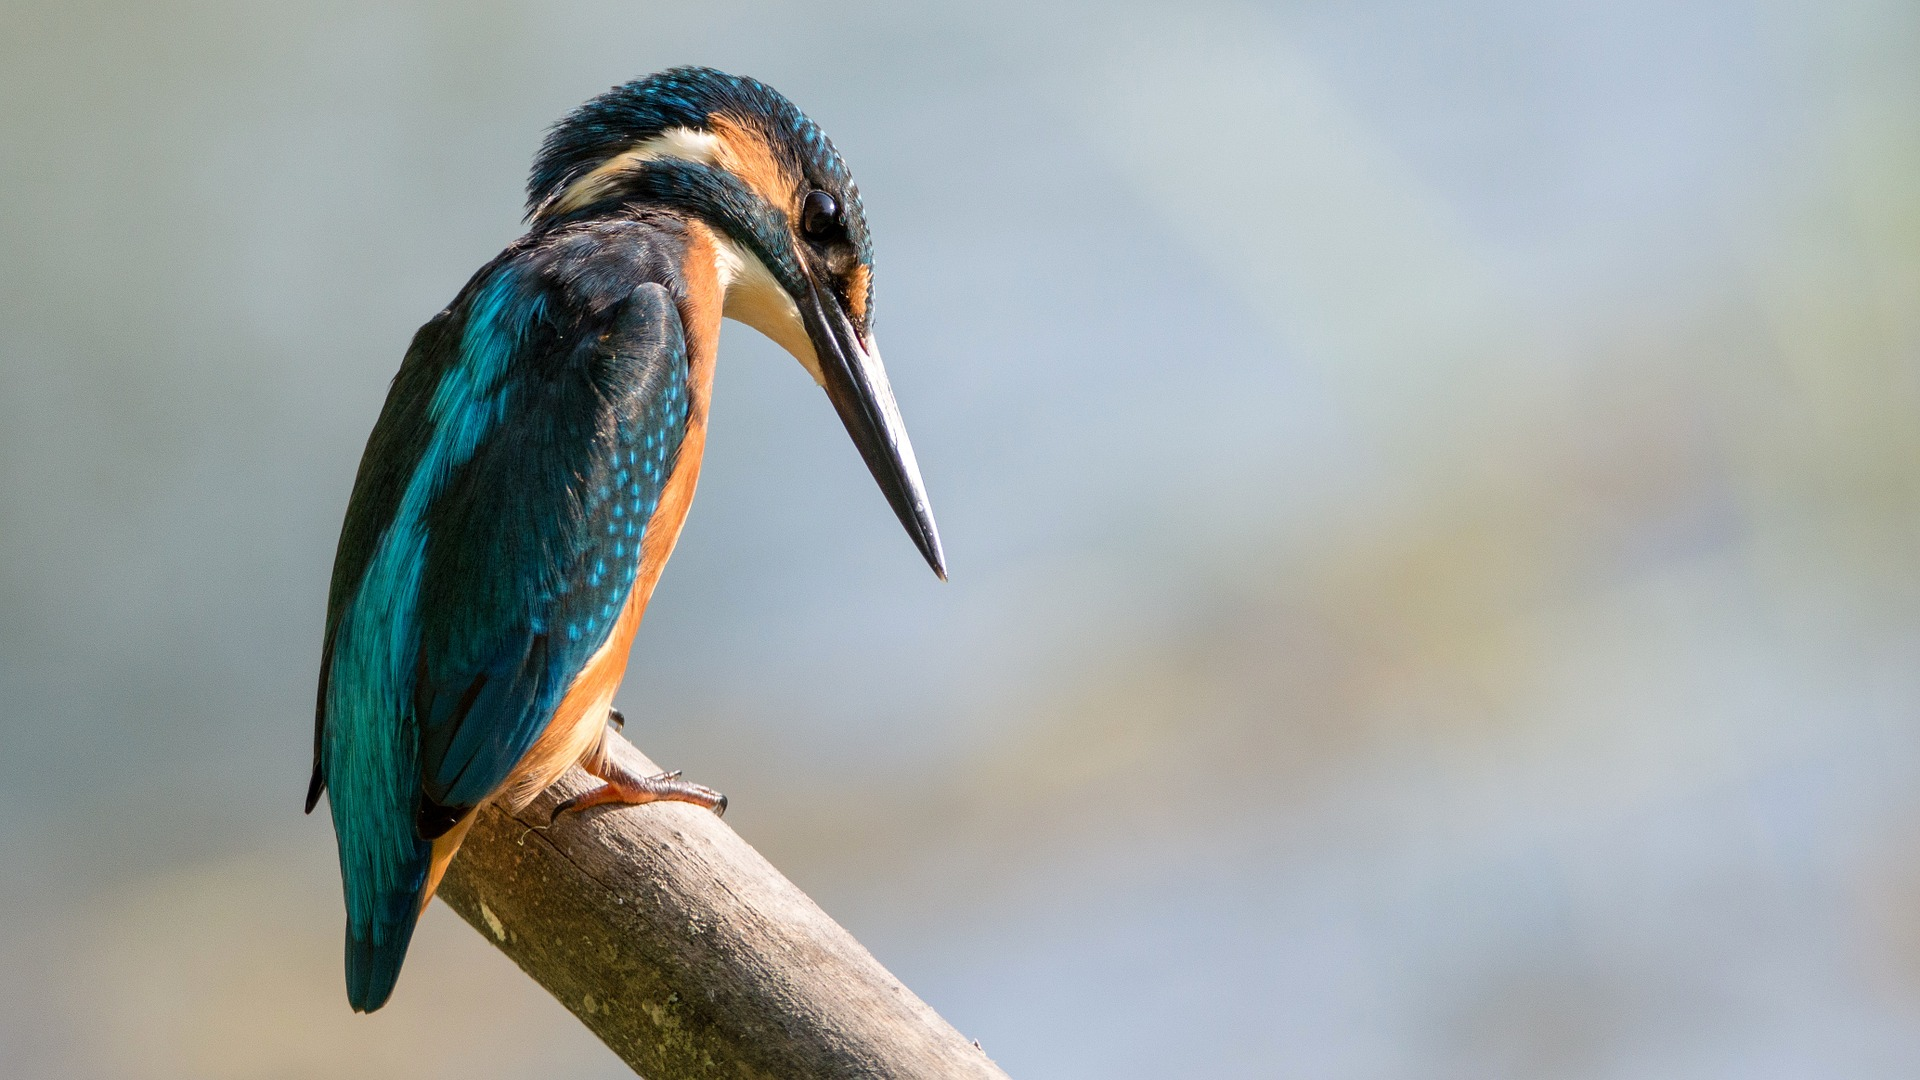

In [5]:
from PIL import Image

# Otwieranie pliku graficznego
obraz = Image.open('files/zimorodek.jpg')

# Wyświetlanie obrazu w przeglądarce systemowej
obraz.show()

# Wyświetlanie obrazu w Jupyter Notebook
display(obraz)

# Zapisanie obrazu w innym formacie
obraz.save('files/kopia_zimorodekPNG.png')


## 8. Obsługa plików wideo w Pythonie
Do obsługi plików wideo w Pythonie najczęściej używamy biblioteki `OpenCV`, która pozwala na odczyt, przetwarzanie oraz zapis plików wideo. Możemy także użyć `MoviePy`, jeśli potrzebujemy zaawansowanej edycji wideo lub animacji.

Przykład odczytu pliku wideo i wyświetlania go klatka po klatce:

In [6]:
import cv2

# Otwieramy plik wideo
video = cv2.VideoCapture('przyklad.mp4')

# Odczyt wideo klatka po klatce
while video.isOpened():
    ret, frame = video.read()  # Odczyt pojedynczej klatki
    if not ret:
        break
    cv2.imshow('Frame', frame)  # Wyświetlanie klatki

    # Zatrzymanie odtwarzania po naciśnięciu klawisza 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Zwolnienie zasobów wideo
video.release()
cv2.destroyAllWindows()


Przykład zapisu przetwarzanego wideo:

In [7]:
import cv2

# Otwieramy plik wideo do odczytu
#video = cv2.VideoCapture('przyklad.mp4')

# Otwieranie kamery (0 - domyślna kamera, np. wbudowana w laptopie)
video = cv2.VideoCapture(0)

# Parametry zapisu wideo
fourcc = cv2.VideoWriter_fourcc(*'h264')
out = cv2.VideoWriter('files/output.mp4', fourcc, 20.0, (640, 480))

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    
    # Konwersja do odcieni szarości
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Zapis przetworzonego wideo
    out.write(gray_frame)

    # Wyświetlanie przetworzonego wideo
    cv2.imshow('Frame', gray_frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Zwolnienie zasobów
video.release()
out.release()
cv2.destroyAllWindows()


## 9. Obsługa plików audio
Do obsługi plików audio, takich jak MP3, WAV, możemy użyć biblioteki `pydub`.

Przykład odtwarzania i zapisywania plików audio:

In [11]:
from pydub import AudioSegment
from pydub.playback import play

# Otwieranie
with open('files/music.mp3', 'rb') as plik_bin:
    zawartosc_bin = plik_bin.read()
    
# Otwieranie pliku audio MP3
audio = AudioSegment.from_file('files/music_ex.mp3','mp3')

# Odtwarzanie pliku audio
play(audio)

# Zapis pliku audio w formacie WAV
audio.export('files/przyklad.wav', format='wav')


C:\Users\M K\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# 10. Obsługa plików CSV
Pliki CSV (Comma-Separated Values) to prosty format danych, który często stosuje się w arkuszach kalkulacyjnych. Możemy obsługiwać pliki CSV za pomocą modułu `csv` lub biblioteki `pandas`.

Przykład odczytu i zapisu plików CSV:

In [8]:
import csv

# Zapis danych do pliku CSV
dane = [
    ['Imie', 'Wiek', 'Miasto'],
    ['Jan', 25, 'Warszawa'],
    ['Anna', 30, 'Kraków']
]

with open('files/dane.csv', 'w', newline='') as plik:
    writer = csv.writer(plik)
    writer.writerows(dane)

# Odczyt danych z pliku CSV
with open('files/dane.csv', 'r') as plik:
    reader = csv.reader(plik)
    for wiersz in reader:
        print(wiersz)


['Imie', 'Wiek', 'Miasto']
['Jan', '25', 'Warszawa']
['Anna', '30', 'Kraków']


## 11. Obsługa plików Excel (XLSX)
Aby obsługiwać pliki Excel (XLSX), możemy użyć biblioteki `openpyxl` lub `pandas`.

Przykład odczytu i zapisu plików Excel:

In [9]:
import pandas as pd

# Zapis danych do pliku Excel
dane = {
    'Imie': ['Jan', 'Anna'],
    'Wiek': [25, 30],
    'Miasto': ['Warszawa', 'Kraków']
}

df = pd.DataFrame(dane)
df.to_excel('files/dane.xlsx', index=False)

# Odczyt pliku Excel
df = pd.read_excel('files/dane.xlsx')
print(df)


   Imie  Wiek    Miasto
0   Jan    25  Warszawa
1  Anna    30    Kraków


## 12. Obsługa plików PDF
Do pracy z plikami PDF używamy biblioteki `PyPDF2`, która pozwala na odczyt, łączenie oraz modyfikację plików PDF.

Przykład łączenia dwóch plików PDF:

In [10]:
import PyPDF2

def polacz_pdf(plik_wejsciowy1, plik_wejsciowy2, plik_wyjsciowy):
    # Otwieramy pliki PDF w trybie binarnym do odczytu
    pdf1 = open(plik_wejsciowy1, 'rb')
    pdf2 = open(plik_wejsciowy2, 'rb')

    # Tworzymy obiekty PDF
    pdf_reader1 = PyPDF2.PdfReader(pdf1)
    pdf_reader2 = PyPDF2.PdfReader(pdf2)

    # Tworzymy nowy obiekt PDF do zapisu
    pdf_writer = PyPDF2.PdfWriter()

    # Dodajemy strony z pierwszego pliku
    for strona in range(len(pdf_reader1.pages)):
        pdf_writer.add_page(pdf_reader1.pages[strona])

    # Dodajemy strony z drugiego pliku
    for strona in range(len(pdf_reader2.pages)):
        pdf_writer.add_page(pdf_reader2.pages[strona])

    # Zapisujemy połączony plik PDF
    with open(plik_wyjsciowy, 'wb') as wyjsciowy_pdf:
        pdf_writer.write(wyjsciowy_pdf)

    # Zamykamy pliki
    pdf1.close()
    pdf2.close()
    print(f"Pliki PDF zostały połączone w plik {plik_wyjsciowy}")

# Użycie funkcji do łączenia dwóch plików PDF
polacz_pdf('files/W1.pdf', 'files/W2.pdf', 'files/polaczony.pdf')


Pliki PDF zostały połączone w plik files/polaczony.pdf


## 13. Obsługa plików ZIP
Do pracy z plikami ZIP możemy używać wbudowanego modułu `zipfile`.

Przykład tworzenia i odczytu pliku ZIP:

In [11]:
import zipfile

# Tworzenie pliku ZIP
with zipfile.ZipFile('files/dane.zip', 'w') as zipf:
    zipf.write('files/dane.csv')
    zipf.write('files/dane.xlsx')
    zipf.write('files/zimorodek.jpg')

# Odczyt pliku ZIP
with zipfile.ZipFile('files/dane.zip', 'r') as zipf:
    zipf.extractall('files/rozpakowane_pliki')


In [ ]:
-> W5
W6 ->

## 14. Najważniejsze funkcje biblioteki pandas
`Pandas` to biblioteka Pythona, która służy do manipulacji i analizy danych. Jest niezwykle popularna do pracy z danymi strukturalnymi, szczególnie tabelarycznymi (np. pliki CSV, Excel). Oferuje wygodne metody do odczytu, zapisu, filtrowania i analizy danych.

Odczyt i zapis danych
1. Odczyt danych:
- `pd.read_csv()`: Odczyt pliku CSV.
- `pd.read_excel()`: Odczyt pliku Excel.
- `pd.read_json()`: Odczyt pliku JSON.
- `pd.read_sql()`: Odczyt danych z bazy SQL.

Przykład:

In [46]:
import pandas as pd

# Odczyt danych z pliku Excel
df_excel = pd.read_excel('files/dane.xlsx')
print(df_excel)


   Imie  Wiek    Miasto
0   Jan    25  Warszawa
1  Anna    30    Kraków


2. Zapis danych:
- `df.to_csv()`: Zapis danych do pliku CSV.
- `df.to_excel()`: Zapis danych do pliku Excel.
- `df.to_json()`: Zapis danych do pliku JSON.
- 
Przykład:

In [16]:
# Zapis danych do pliku CSV
df.to_csv('files/nowe_dane.csv', index=False)

# Zapis danych do pliku Excel
df.to_excel('files/nowe_dane.xlsx', index=False)


Podstawowe operacje na danych
1. Wyświetlanie danych:
- `df.head()`: Wyświetla pierwsze 5 wierszy.
- `df.tail()`: Wyświetla ostatnie 5 wierszy.
- `df.info()`: Informacje o ramce danych (kolumny, typy danych, liczba niepustych wartości).
 
Przykład:

In [17]:
print(df.head())  # Pierwsze 5 wierszy
print()
print(df.info())  # Informacje o ramce danych


   Imie  Wiek    Miasto
0   Jan    25  Warszawa
1  Anna    30    Kraków

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Imie    2 non-null      object
 1   Wiek    2 non-null      int64 
 2   Miasto  2 non-null      object
dtypes: int64(1), object(2)
memory usage: 180.0+ bytes
None


2. Filtrowanie danych: Pandas umożliwia filtrowanie danych na podstawie warunków logicznych.
   
Przykład filtrowania danych:

In [50]:
# Filtrowanie wierszy, gdzie wiek jest większy niż 25
filtrowane_dane = df[df['Wiek'] > 25]
print(filtrowane_dane)


   Imie  Wiek  Miasto
1  Anna    30  Kraków


3. Dodawanie i modyfikowanie kolumn: Pandas umożliwia łatwe dodawanie nowych kolumn lub modyfikowanie istniejących.
   
Przykład:

In [18]:
# Dodanie nowej kolumny na podstawie istniejących danych
df['Nowa_kolumna'] = df['Wiek'] * 2
print(df)
print()
# Modyfikowanie wartości w kolumnie
df['Wiek'] = df['Wiek'] + 1
print(df)


   Imie  Wiek    Miasto  Nowa_kolumna
0   Jan    25  Warszawa            50
1  Anna    30    Kraków            60

   Imie  Wiek    Miasto  Nowa_kolumna
0   Jan    26  Warszawa            50
1  Anna    31    Kraków            60


4. Grupowanie danych: `groupby()` umożliwia grupowanie danych na podstawie jednej lub wielu kolumn.
   
Przykład grupowania:

In [19]:
# Grupowanie danych po kolumnie 'Miasto' i obliczanie średniego wieku
grupowane = df.groupby('Miasto')['Wiek'].mean()
print(grupowane)


Miasto
Kraków      31.0
Warszawa    26.0
Name: Wiek, dtype: float64


5. Sortowanie danych:
- `df.sort_values(by='kolumna')`: Sortowanie danych po kolumnie.
- `df.sort_index()`: Sortowanie po indeksie.
  
Przykład sortowania:

In [54]:
# Sortowanie według wieku
df_sorted = df.sort_values(by='Wiek')
print(df_sorted)


   Imie  Wiek    Miasto  Nowa_kolumna
0   Jan    27  Warszawa            52
1  Anna    32    Kraków            62


6. Braki danych: Pandas oferuje metody do obsługi brakujących wartości.
- `df.isnull()`: Sprawdza, gdzie są braki danych.
- `df.fillna()`: Wypełnia brakujące dane.
- `df.dropna()`: Usuwa wiersze z brakującymi danymi.

Przykład:

In [20]:
# Nowy wiersz w formie DataFrame
nowy_wiersz = pd.DataFrame({'Imie': ['Piotr'], 'Wiek': [22], 'Miasto': ['Opole']})

# Dodanie nowego wiersza za pomocą pandas.concat()
df = pd.concat([df, nowy_wiersz], ignore_index=True)

print(df)

# Sprawdzenie brakujących danych
print(df.isnull())

# Wypełnianie braków wartościami domyślnymi
df_filled = df.fillna(0)
print(df_filled)

# Usuwanie wierszy z brakującymi danymi
df_cleaned = df.dropna()
print(df_cleaned)


    Imie  Wiek    Miasto  Nowa_kolumna
0    Jan    26  Warszawa          50.0
1   Anna    31    Kraków          60.0
2  Piotr    22     Opole           NaN
    Imie   Wiek  Miasto  Nowa_kolumna
0  False  False   False         False
1  False  False   False         False
2  False  False   False          True
    Imie  Wiek    Miasto  Nowa_kolumna
0    Jan    26  Warszawa          50.0
1   Anna    31    Kraków          60.0
2  Piotr    22     Opole           0.0
   Imie  Wiek    Miasto  Nowa_kolumna
0   Jan    26  Warszawa          50.0
1  Anna    31    Kraków          60.0
